# Home 3: Build a CNN for image recognition.

### Name: Sushmith Ramesh


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [56]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = numpy.mean(x_train,axis=(0,1,2,3))
std = numpy.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [57]:
def to_one_hot(y, num_class=10):
    results = numpy.zeros((len(y), num_class))
    for i, label in enumerate(y):
        results[i, label] = 1
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [58]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [59]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import regularizers
from keras.models import Sequential

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_63 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_52 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
__________

In [0]:
from keras import optimizers

learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [61]:
history = model.fit(x_tr, y_tr, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 32s 811us/step - loss: 2.0219 - acc: 0.3067 - val_loss: 1.6084 - val_acc: 0.4054
Epoch 2/100
40000/40000 [==============================] - 25s 637us/step - loss: 1.5187 - acc: 0.4622 - val_loss: 1.4692 - val_acc: 0.4740
Epoch 3/100
40000/40000 [==============================] - 25s 623us/step - loss: 1.3375 - acc: 0.5320 - val_loss: 1.2750 - val_acc: 0.5526
Epoch 4/100
40000/40000 [==============================] - 25s 625us/step - loss: 1.2101 - acc: 0.5823 - val_loss: 1.2196 - val_acc: 0.5674
Epoch 5/100
40000/40000 [==============================] - 25s 623us/step - loss: 1.1117 - acc: 0.6177 - val_loss: 1.1510 - val_acc: 0.6027
Epoch 6/100
40000/40000 [==============================] - 25s 622us/step - loss: 1.0310 - acc: 0.6498 - val_loss: 0.9719 - val_acc: 0.6648
Epoch 7/100
40000/40000 [==============================] - 24s 609us/step - loss: 0.9725 - acc: 0.6677 - val_l

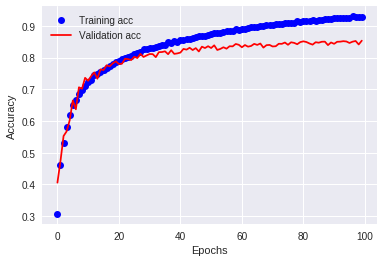

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [63]:
# <Compile your model again (using the same hyper-parameters)>

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()

from keras import optimizers

learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_70 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_57 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 16, 16, 32)        0         
__________

In [64]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>

model.fit(x_train, y_train_vec, batch_size=64, epochs=100)

Epoch 1/100
50000/50000 [==============================] - 38s 770us/step - loss: 1.9076 - acc: 0.3532
Epoch 2/100
50000/50000 [==============================] - 34s 680us/step - loss: 1.4061 - acc: 0.5044
Epoch 3/100
50000/50000 [==============================] - 34s 680us/step - loss: 1.2239 - acc: 0.5769
Epoch 4/100
50000/50000 [==============================] - 34s 680us/step - loss: 1.1063 - acc: 0.6193
Epoch 5/100
50000/50000 [==============================] - 34s 679us/step - loss: 1.0314 - acc: 0.6445
Epoch 6/100
50000/50000 [==============================] - 33s 669us/step - loss: 0.9672 - acc: 0.6697
Epoch 7/100
50000/50000 [==============================] - 34s 670us/step - loss: 0.9163 - acc: 0.6889
Epoch 8/100
50000/50000 [==============================] - 33s 670us/step - loss: 0.8709 - acc: 0.7081
Epoch 9/100
50000/50000 [==============================] - 34s 674us/step - loss: 0.8435 - acc: 0.7172
Epoch 10/100
50000/50000 [==============================] - 33s 670us/ste

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [65]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 4s 406us/step
loss = 0.5198424721479415
accuracy = 0.8536
